##Import dependencies

In [1]:
!pip install opendatasets
!pip install pandas
import tensorflow as tf
import opendatasets as od
import pandas as pd
import numpy as np
import cv2 as cv
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
from PIL import Image

2023-06-16 01:27:08.380916: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Download the ddataset from the Kaggle API
# od.download('https://www.kaggle.com/datasets/sagyamthapa/handwritten-math-symbols', force=True)

## Preprocess the Colors


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

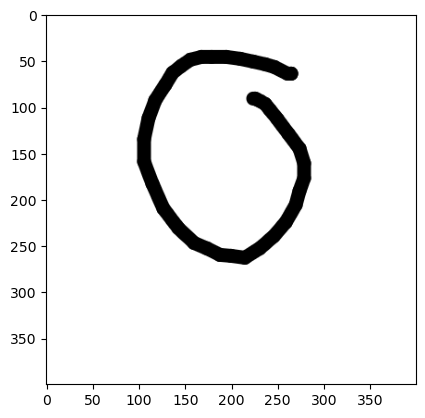

In [3]:
img = np.asarray(Image.open('./handwritten-math-symbols/dataset/0/0CdBlhLw.png'))
imgplot = plt.imshow(img)
print(repr(img))
print(img.shape)

In [4]:
# Convert from CMYK to Gray scale
data_dir = './handwritten-math-symbols/dataset/'

for image_class in os.listdir(data_dir):
  if image_class.startswith('.'):
    continue
  for image in os.listdir(os.path.join(data_dir, image_class)):
    try:
      image_path = os.path.join(data_dir, image_class, image)
      image = cv.imread(image_path)
      grayImage = cv.cvtColor(image, cv.COLOR_RGBA2RGB)
      cv.imwrite(image_path, grayImage)
    except:
      continue

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

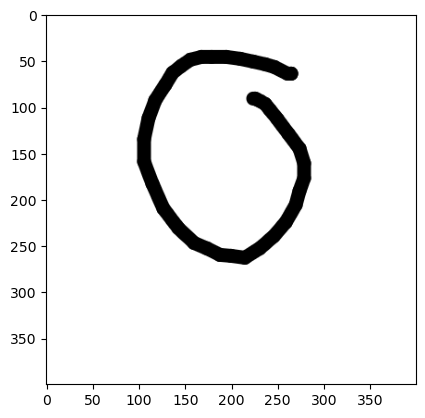

In [5]:
img = np.asarray(Image.open('./handwritten-math-symbols/dataset/0/0CdBlhLw.png'))
imgplot = plt.imshow(img)
print(repr(img))
print(img.shape)

In [6]:
batch_size = 8
image_size = (32,32)
data_set = tf.keras.utils.image_dataset_from_directory('./handwritten-math-symbols/dataset/', batch_size = batch_size, image_size = image_size)

Found 10071 files belonging to 19 classes.


In [7]:
print(repr(img))
print(img.shape)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

## Preprocess data set

In [8]:
from matplotlib.image import imread
imread('./handwritten-math-symbols/dataset/0/0CdBlhLw.png')

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [9]:
# Normalize images
data_set = data_set.map(lambda x,y: (x/255, y))


In [10]:
input_shape=(32,32,3)

train_size = int(len(data_set)* .7)
val_size = int(len(data_set)*.2)+1
test_size = int(len(data_set)*.1)+1

In [11]:
train = data_set.take(train_size)
val = data_set.skip(train_size).take(val_size)
test = data_set.skip(train_size + val_size).take(test_size)

## Create Model using Resnet-50

In [12]:
data_directory = './handwritten-math-symbols/dataset'
img_height = 32
img_width = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(

  data_directory,

  validation_split=0.2,

  subset="training",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 10071 files belonging to 19 classes.
Using 8057 files for training.


In [13]:

# for image in train_ds:
#   print(image)

# images, _ = next(train_ds)
# plt.imshow(images[0])

In [14]:
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(

  data_directory,

  validation_split=0.2,

  subset="validation",

  seed=123,

label_mode='categorical',

  image_size=(img_height, img_width),

  batch_size=batch_size)

Found 10071 files belonging to 19 classes.
Using 2014 files for validation.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

demo_resnet_model = Sequential()

pretrained_model_for_demo= tf.keras.applications.ResNet50(include_top=False,

                   input_shape=input_shape,

                   pooling='avg',classes=19,

                   weights='imagenet')

for each_layer in pretrained_model_for_demo.layers:

        each_layer.trainable=False

demo_resnet_model.add(pretrained_model_for_demo)

94765736/94765736 [==============================] - 8s 0us/step


In [16]:
demo_resnet_model.add(Flatten())

demo_resnet_model.add(Dense(512, activation='relu'))

demo_resnet_model.add(Dense(19, activation='softmax'))

In [17]:
demo_resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

epochs = 10
history = demo_resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/10


2023-06-16 01:27:43.240824: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8057]
	 [[{{node Placeholder/_0}}]]
2023-06-16 01:27:43.241359: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8057]
	 [[{{node Placeholder/_0}}]]


1008/1008 [==============================] - ETA: 0s - loss: 0.9836 - accuracy: 0.7010

2023-06-16 01:28:26.917341: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2014]
	 [[{{node Placeholder/_4}}]]
2023-06-16 01:28:26.917757: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2014]
	 [[{{node Placeholder/_4}}]]


1008/1008 [==============================] - 55s 51ms/step - loss: 0.9836 - accuracy: 0.7010 - val_loss: 0.7619 - val_accuracy: 0.7468
Epoch 2/10
1008/1008 [==============================] - 67s 67ms/step - loss: 0.5510 - accuracy: 0.8167 - val_loss: 0.5494 - val_accuracy: 0.8237
Epoch 3/10
1008/1008 [==============================] - 56s 56ms/step - loss: 0.4549 - accuracy: 0.8502 - val_loss: 0.6562 - val_accuracy: 0.7900
Epoch 4/10
1008/1008 [==============================] - 78s 78ms/step - loss: 0.3882 - accuracy: 0.8679 - val_loss: 0.6432 - val_accuracy: 0.8039
Epoch 5/10
1008/1008 [==============================] - 64s 64ms/step - loss: 0.3378 - accuracy: 0.8857 - val_loss: 0.5001 - val_accuracy: 0.8496
Epoch 6/10
1008/1008 [==============================] - 66s 65ms/step - loss: 0.3016 - accuracy: 0.8961 - val_loss: 0.5632 - val_accuracy: 0.8421
Epoch 7/10
1008/1008 [==============================] - 64s 64ms/step - loss: 0.2553 - accuracy: 0.9147 - val_loss: 0.4896 - val_accura

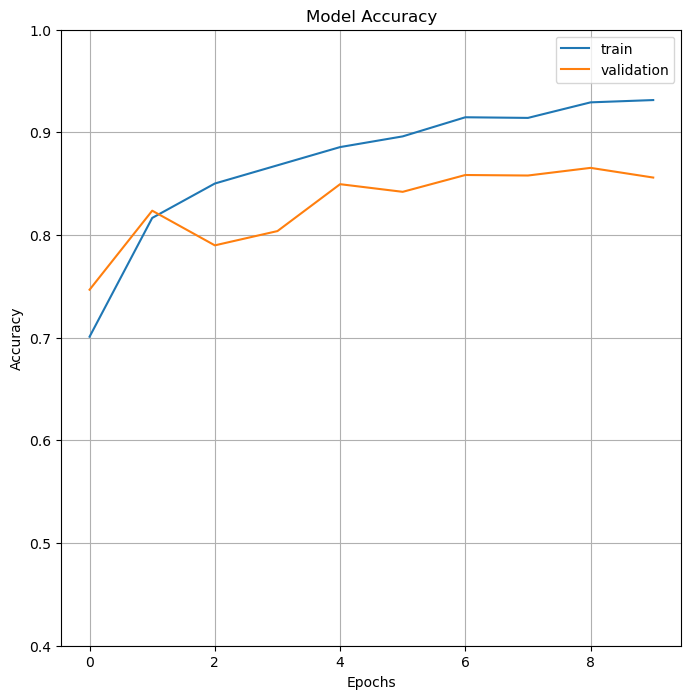

In [18]:
plt.figure(figsize=(8, 8))

epochs_range= range(epochs)

plt.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plt.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plt.axis(ymin=0.4,ymax=1)

plt.grid()

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend(['train', 'validation'])

In [19]:
#plotter_lib.show()

plotter_lib.savefig('output-plot.png')

NameError: name 'plotter_lib' is not defined

## Create Model using MobileNet

In [ ]:
# from tensorflow.keras.applications import MobileNetV2

In [ ]:
# mobilenet_input_shape = (32, 32, 3)
# mobilenet_model = tf.keras.applications.MobileNetV2(include_top=False,
#                                                     input_shape=(224, 224, 3),
#                                                     pooling='avg',classes=19,
#                                                     weights='imagenet')


## Create Model using VGG19

In [ ]:
from tensorflow.keras.applications import VGG19

In [ ]:
vgg19_model = Sequential()

vgg19_pretrained_model= tf.keras.applications.VGG19(include_top=False,

                   input_shape=input_shape,

                   pooling='avg',classes=19,

                   weights='imagenet')

for each_layer in vgg19_pretrained_model.layers:
        each_layer.trainable=False

vgg19_model.add(vgg19_pretrained_model)

In [ ]:
vgg19_model.add(Flatten())

vgg19_model.add(Dense(512, activation='relu'))

vgg19_model.add(Dense(19, activation='softmax'))

In [ ]:
vgg19_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

epochs = 8
try:
  history = vgg19_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)
except Exception as e: print(e)

In [ ]:
# Test

plt.figure(figsize=(8, 8))

epochs_range= range(epochs)

plt.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")

plt.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")

plt.axis(ymin=0.4,ymax=1)

plt.grid()

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend(['train', 'validation'])

## Create Model using Inception

In [ ]:
from tensorflow.keras.applications import Inception_v3

In [ ]:
inception_model = Sequential()

inception_pretrained_model= tf.keras.applications.Inception_v3(include_top=False,

                   input_shape=input_shape,

                   pooling='avg',classes=19,

                   weights='imagenet')

for each_layer in vgg19_pretrained_model.layers:
        each_layer.trainable=False

vgg19_model.add(vgg19_pretrained_model)

## Create Model using Tensorflow

In [ ]:
tf_model = models.Sequential()

# Convolutional base
tf_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
tf_model.add(layers.MaxPooling2D((2, 2)))
tf_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
tf_model.add(layers.MaxPooling2D((2, 2)))
tf_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dense layers
tf_model.add(layers.Flatten())
tf_model.add(layers.Dense(64, activation='relu'))
tf_model.add(layers.Dense(19))
tf_model.summary()

# The summary shows that the convolutional base has a (4, 4, 64) output, which
#   is flattened into a (1024) shaped vector, and then sent through two Dense
#   layers

tf_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

tf_history = tf_model.fit(train, epochs=10,
                    validation_data=val)

In [ ]:
plt.plot(tf_history.history['accuracy'], label='accuracy')
plt.plot(tf_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = tf_model.evaluate(test, verbose=2)